# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
api_key = "9bf1187f868375163b2b5ced90b3efb9"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [134]:
print(api_key)

9bf1187f868375163b2b5ced90b3efb9


## Generate Cities List

In [137]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [138]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [139]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{base_url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9bf1187f868375163b2b5ced90b3efb9&units=metric&q=


In [141]:


for index, city in enumerate(cities, start = 1):
    try:
        weather_response = requests.get(query_url + city).json()
        city_list.append(weather_response["name"])
        cloudiness_list.append(weather_response["clouds"]["all"])
        country_list.append(weather_response["sys"]["country"])
        date_list.append(weather_response["dt"])
        humidity_list. append(weather_response["main"]["humidity"])
        lats_list.append(weather_response["coord"]["lat"])
        lngs_list.append(weather_response["coord"]["lon"])
        max_temp_list.append(weather_response["main"]["temp_max"])
        wind_speed_list.append(weather_response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter}: {city}")
        
    except(KeyError, IndexError):
        print("City mnot found. Skipping...")
        
print("--------------")
print("Data Retrieval Complete")
print("--------------")

City mnot found. Skipping...
Processing Record 1 of Set 1: yellowknife
Processing Record 2 of Set 1: new norfolk
Processing Record 3 of Set 1: bambous virieux
Processing Record 4 of Set 1: katsuura
City mnot found. Skipping...
Processing Record 5 of Set 1: saint anthony
City mnot found. Skipping...
Processing Record 6 of Set 1: melo
Processing Record 7 of Set 1: port alfred
Processing Record 8 of Set 1: eureka
Processing Record 9 of Set 1: baijiantan
Processing Record 10 of Set 1: rikitea
City mnot found. Skipping...
Processing Record 11 of Set 1: belaya kholunitsa
Processing Record 12 of Set 1: alofi
Processing Record 13 of Set 1: sitka
Processing Record 14 of Set 1: talnakh
Processing Record 15 of Set 1: bredasdorp
Processing Record 16 of Set 1: dvinskoy
Processing Record 17 of Set 1: barrow
Processing Record 18 of Set 1: san isidro
Processing Record 19 of Set 1: tooele
Processing Record 20 of Set 1: les escoumins
Processing Record 21 of Set 1: arraial do cabo
Processing Record 22 of

Processing Record 37 of Set 4: forbes
Processing Record 38 of Set 4: grindavik
Processing Record 39 of Set 4: vestmannaeyjar
Processing Record 40 of Set 4: palmer
Processing Record 41 of Set 4: hamilton
Processing Record 42 of Set 4: zarinsk
Processing Record 43 of Set 4: acajutla
Processing Record 44 of Set 4: teya
Processing Record 45 of Set 4: olinda
Processing Record 46 of Set 4: coihaique
Processing Record 47 of Set 4: varkkallai
Processing Record 48 of Set 4: beringovskiy
Processing Record 49 of Set 4: ulcinj
Processing Record 50 of Set 4: pevek
Processing Record 0 of Set 5: nouakchott
Processing Record 1 of Set 5: taoudenni
Processing Record 2 of Set 5: kasongo-lunda
Processing Record 3 of Set 5: anadyr
City mnot found. Skipping...
Processing Record 4 of Set 5: ardesen
Processing Record 5 of Set 5: constitucion
City mnot found. Skipping...
Processing Record 6 of Set 5: dalvik
Processing Record 7 of Set 5: gharghoda
Processing Record 8 of Set 5: sann
Processing Record 9 of Set 5:

Processing Record 32 of Set 8: hodmezovasarhely
Processing Record 33 of Set 8: lodwar
Processing Record 34 of Set 8: vila franca do campo
Processing Record 35 of Set 8: dakar
Processing Record 36 of Set 8: valparaiso
Processing Record 37 of Set 8: khuzhir
Processing Record 38 of Set 8: orcopampa
Processing Record 39 of Set 8: lompoc
Processing Record 40 of Set 8: ulladulla
Processing Record 41 of Set 8: rocha
Processing Record 42 of Set 8: santa cruz cabralia
Processing Record 43 of Set 8: little current
Processing Record 44 of Set 8: balaipungut
Processing Record 45 of Set 8: chiang khong
Processing Record 46 of Set 8: yuli
Processing Record 47 of Set 8: slave lake
Processing Record 48 of Set 8: gat
City mnot found. Skipping...
Processing Record 49 of Set 8: owando
Processing Record 50 of Set 8: luwuk
Processing Record 0 of Set 9: taltal
Processing Record 1 of Set 9: clocolan
Processing Record 2 of Set 9: margate
Processing Record 3 of Set 9: coquimbo
Processing Record 4 of Set 9: lak

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [155]:
print(len(city_list))
print(len(lats_list))
print(len(lngs_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(wind_speed_list))
print(len(country_list))
print(len(date_list))

568
568
568
568
568
568
567
568
568


In [159]:
weather_data = {"city" : city_list,
                "lat" : lats_list,
                "lng" : lngs_list,
                "Max Temp" : max_temp_list,
                "humidity" : humidity_list,
                "cloudiness" : cloudiness_list,
                "country" : country_list,
                "Date" : date_list
}

In [160]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,city,lat,lng,Max Temp,humidity,cloudiness,country,Date
0,Yellowknife,62.46,-114.35,-11.11,85,75,CA,1604776082
1,Yellowknife,62.46,-114.35,-11.11,85,75,CA,1604776082
2,New Norfolk,-42.78,147.06,5.56,71,6,AU,1604776344
3,Bambous Virieux,-20.34,57.76,23.00,78,20,MU,1604776344
4,Katsuura,35.13,140.30,21.00,83,75,JP,1604776334


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

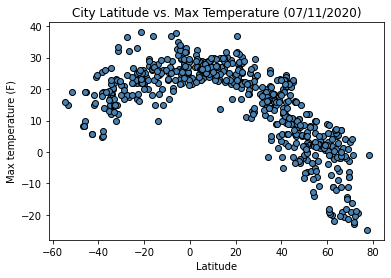

In [167]:
plt.scatter(weather_df["lat"], weather_df["Max Temp"], color = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.title("City Latitude vs. Max Temperature (07/11/2020)")
plt.savefig("Max_temp.png") 

#### Latitude vs. Humidity Plot

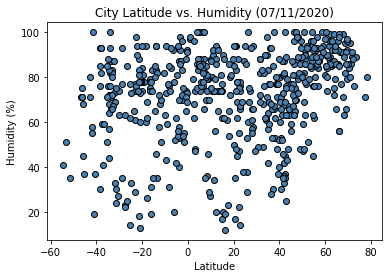

In [168]:
plt.scatter(weather_df["lat"], weather_df["humidity"], color = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (07/11/2020)")
plt.savefig("Lat vs hum.png") 

#### Latitude vs. Cloudiness Plot

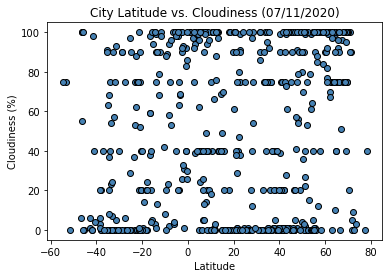

In [169]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], color = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (07/11/2020)")
plt.savefig("Lat vs cloudiness.png") 

#### Latitude vs. Wind Speed Plot

In [173]:
plt.scatter(weather_df["lat"], data = {wind_speed_list}, color = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/11/2020)")
plt.savefig("Lat vs windspeed.png") 

TypeError: unhashable type: 'list'